## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  62.752424   585.131200  0.388082  9.410086  235.478097
1  95.789707   290.646199  0.464726  5.861854  165.643026
2  40.397025   792.531778  0.558049  2.777339  444.006917
3  71.235768  1006.760109  0.171428  5.345737  186.532033
4  19.088126  1415.143398  0.387331  2.686490  548.463203


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9844719	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9726717	total: 58ms	remaining: 28.9s
2:	learn: 0.9627360	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9511838	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9368309	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9248596	total: 59.8ms	remaining: 9.9s
6:	learn: 0.9119754	total: 60.3ms	remaining: 8.56s
7:	learn: 0.9014090	total: 60.6ms	remaining: 7.52s
8:	learn: 0.8897228	total: 61ms	remaining: 6.72s
9:	learn: 0.8777816	total: 61.6ms	remaining: 6.09s
10:	learn: 0.8664524	total: 62.5ms	remaining: 5.61s
11:	learn: 0.8519412	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8403591	total: 63.8ms	remaining: 4.85s
13:	learn: 0.8273430	total: 64.4ms	remaining: 4.53s
14:	learn: 0.8157885	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8055939	total: 65ms	remaining: 4s
16:	learn: 0.7957686	total: 65.5ms	remaining: 3.79s
17:	learn: 0.7847345	total: 65.9ms	remaining: 3.59s
18:	learn: 0.7769690	total: 66.2ms	remaining: 3.42s
19:

115:	learn: 0.2525623	total: 112ms	remaining: 857ms
116:	learn: 0.2492113	total: 113ms	remaining: 853ms
117:	learn: 0.2466342	total: 114ms	remaining: 849ms
118:	learn: 0.2438714	total: 114ms	remaining: 846ms
119:	learn: 0.2419907	total: 115ms	remaining: 842ms
120:	learn: 0.2390658	total: 115ms	remaining: 838ms
121:	learn: 0.2373704	total: 116ms	remaining: 834ms
122:	learn: 0.2352635	total: 116ms	remaining: 830ms
123:	learn: 0.2331428	total: 117ms	remaining: 825ms
124:	learn: 0.2314261	total: 117ms	remaining: 821ms
125:	learn: 0.2290708	total: 118ms	remaining: 817ms
126:	learn: 0.2266811	total: 118ms	remaining: 814ms
127:	learn: 0.2247587	total: 119ms	remaining: 809ms
128:	learn: 0.2232697	total: 119ms	remaining: 807ms
129:	learn: 0.2214062	total: 120ms	remaining: 802ms
130:	learn: 0.2194292	total: 120ms	remaining: 798ms
131:	learn: 0.2176434	total: 121ms	remaining: 795ms
132:	learn: 0.2159406	total: 121ms	remaining: 791ms
133:	learn: 0.2137078	total: 122ms	remaining: 787ms
134:	learn: 

266:	learn: 0.0850453	total: 185ms	remaining: 509ms
267:	learn: 0.0846071	total: 186ms	remaining: 508ms
268:	learn: 0.0840954	total: 187ms	remaining: 507ms
269:	learn: 0.0836971	total: 187ms	remaining: 506ms
270:	learn: 0.0832880	total: 187ms	remaining: 504ms
271:	learn: 0.0827704	total: 188ms	remaining: 503ms
272:	learn: 0.0823568	total: 188ms	remaining: 501ms
273:	learn: 0.0818379	total: 189ms	remaining: 500ms
274:	learn: 0.0814707	total: 189ms	remaining: 499ms
275:	learn: 0.0811433	total: 190ms	remaining: 498ms
276:	learn: 0.0806796	total: 190ms	remaining: 497ms
277:	learn: 0.0803933	total: 191ms	remaining: 495ms
278:	learn: 0.0800760	total: 191ms	remaining: 494ms
279:	learn: 0.0797441	total: 192ms	remaining: 493ms
280:	learn: 0.0794213	total: 192ms	remaining: 492ms
281:	learn: 0.0790752	total: 193ms	remaining: 491ms
282:	learn: 0.0786968	total: 193ms	remaining: 489ms
283:	learn: 0.0783528	total: 194ms	remaining: 488ms
284:	learn: 0.0780164	total: 194ms	remaining: 487ms
285:	learn: 

499:	learn: 0.0289420	total: 294ms	remaining: 294ms
500:	learn: 0.0287604	total: 295ms	remaining: 294ms
501:	learn: 0.0286639	total: 295ms	remaining: 293ms
502:	learn: 0.0284999	total: 296ms	remaining: 292ms
503:	learn: 0.0283380	total: 296ms	remaining: 291ms
504:	learn: 0.0281937	total: 296ms	remaining: 291ms
505:	learn: 0.0280349	total: 297ms	remaining: 290ms
506:	learn: 0.0279415	total: 297ms	remaining: 289ms
507:	learn: 0.0277456	total: 298ms	remaining: 288ms
508:	learn: 0.0276234	total: 298ms	remaining: 288ms
509:	learn: 0.0274526	total: 299ms	remaining: 287ms
510:	learn: 0.0272990	total: 299ms	remaining: 286ms
511:	learn: 0.0271481	total: 299ms	remaining: 285ms
512:	learn: 0.0270594	total: 300ms	remaining: 285ms
513:	learn: 0.0268867	total: 300ms	remaining: 284ms
514:	learn: 0.0267528	total: 301ms	remaining: 283ms
515:	learn: 0.0265897	total: 301ms	remaining: 283ms
516:	learn: 0.0264431	total: 302ms	remaining: 282ms
517:	learn: 0.0262989	total: 302ms	remaining: 281ms
518:	learn: 

658:	learn: 0.0142531	total: 367ms	remaining: 190ms
659:	learn: 0.0141715	total: 367ms	remaining: 189ms
660:	learn: 0.0141191	total: 368ms	remaining: 189ms
661:	learn: 0.0140645	total: 369ms	remaining: 188ms
662:	learn: 0.0140195	total: 369ms	remaining: 188ms
663:	learn: 0.0139753	total: 370ms	remaining: 187ms
664:	learn: 0.0139317	total: 370ms	remaining: 186ms
665:	learn: 0.0138889	total: 371ms	remaining: 186ms
666:	learn: 0.0138468	total: 371ms	remaining: 185ms
667:	learn: 0.0138053	total: 372ms	remaining: 185ms
668:	learn: 0.0137303	total: 372ms	remaining: 184ms
669:	learn: 0.0136897	total: 373ms	remaining: 184ms
670:	learn: 0.0136536	total: 373ms	remaining: 183ms
671:	learn: 0.0136136	total: 374ms	remaining: 182ms
672:	learn: 0.0135508	total: 374ms	remaining: 182ms
673:	learn: 0.0135155	total: 374ms	remaining: 181ms
674:	learn: 0.0134763	total: 375ms	remaining: 180ms
675:	learn: 0.0134211	total: 375ms	remaining: 180ms
676:	learn: 0.0133656	total: 376ms	remaining: 179ms
677:	learn: 

890:	learn: 0.0058163	total: 475ms	remaining: 58.1ms
891:	learn: 0.0057855	total: 476ms	remaining: 57.6ms
892:	learn: 0.0057611	total: 477ms	remaining: 57.1ms
893:	learn: 0.0057435	total: 477ms	remaining: 56.6ms
894:	learn: 0.0057190	total: 478ms	remaining: 56ms
895:	learn: 0.0057075	total: 478ms	remaining: 55.5ms
896:	learn: 0.0056820	total: 478ms	remaining: 54.9ms
897:	learn: 0.0056582	total: 479ms	remaining: 54.4ms
898:	learn: 0.0056286	total: 479ms	remaining: 53.8ms
899:	learn: 0.0056047	total: 480ms	remaining: 53.3ms
900:	learn: 0.0055850	total: 480ms	remaining: 52.7ms
901:	learn: 0.0055701	total: 480ms	remaining: 52.2ms
902:	learn: 0.0055591	total: 481ms	remaining: 51.7ms
903:	learn: 0.0055330	total: 481ms	remaining: 51.1ms
904:	learn: 0.0055109	total: 482ms	remaining: 50.6ms
905:	learn: 0.0054882	total: 482ms	remaining: 50ms
906:	learn: 0.0054650	total: 483ms	remaining: 49.5ms
907:	learn: 0.0054487	total: 483ms	remaining: 49ms
908:	learn: 0.0054380	total: 484ms	remaining: 48.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


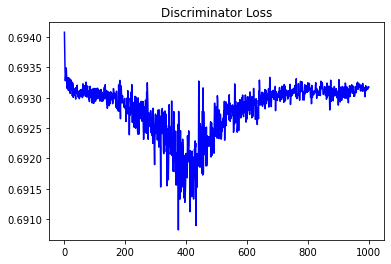

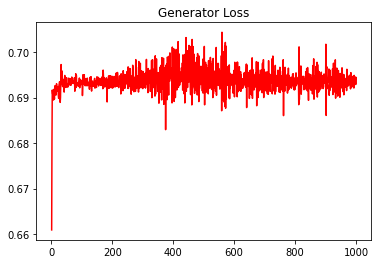

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.02476420040069842


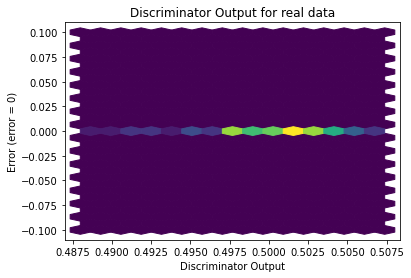

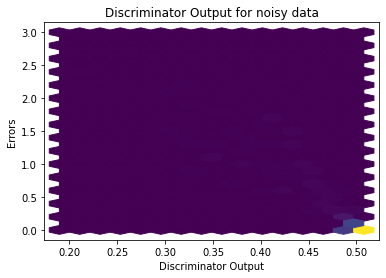

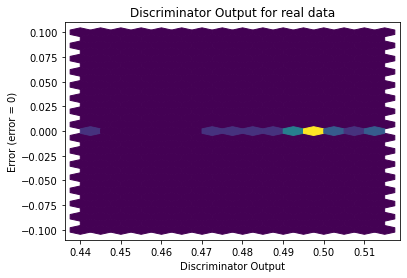

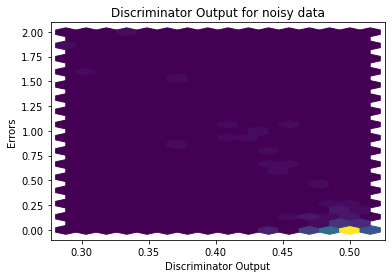

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1178]], requires_grad=True)
